In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Import buildbot nightly-value run 00437

In [2]:
data_dirty = pd.read_csv(filepath_or_buffer='./00437.-r_integration-nightly-value.2023-03-01_00-26-24.table.csv',sep='\t',header=2,index_col=0)

In [3]:
data_in = data_dirty.copy()

#Drop tasks with status TIMEOUT and unknown
# We cannot train on them, because we do not know the stats
# at the time when they would have finished
columns_false = data_in[data_in.status.str.startswith('false', na=False)]
columns_true = data_in[data_in.status.str.startswith('true', na=False)]

data_clean = pd.concat([columns_false,columns_true])

#Drop completely empty columns
# (such as Solver time when evaluating a value analysis result)
data_clean = data_clean.dropna(axis='columns',how='all')

## 1) Baseline Linear Regression: CPU Time + Number of iterations

### Select metrics to analyze

In [4]:
data_in = data_clean.copy()

data_1 = data_in[['CPU Time (s)','Number of iterations']]
data_1 = data_1.dropna()

### Regression Pipeline

In [5]:
x_sr = data_1[['Number of iterations']]
y_sr = data_1['CPU Time (s)']

LR = LinearRegression()
LR.fit(x_sr.values.reshape(-1,1),y_sr.values)

LinearRegression()

### K-Fold Cross Validation

In [6]:
scores = cross_val_score(LR, x_sr.values.reshape(-1,1), y_sr.values, cv=5)
print("Mean r2 = %0.2f with a standard deviation of %0.2f:\n%s" % (scores.mean(), scores.std(), scores))

Mean r2 = -13.48 with a standard deviation of 28.18:
[  0.78785148   0.58218299   0.60896076 -69.84601617   0.46400649]


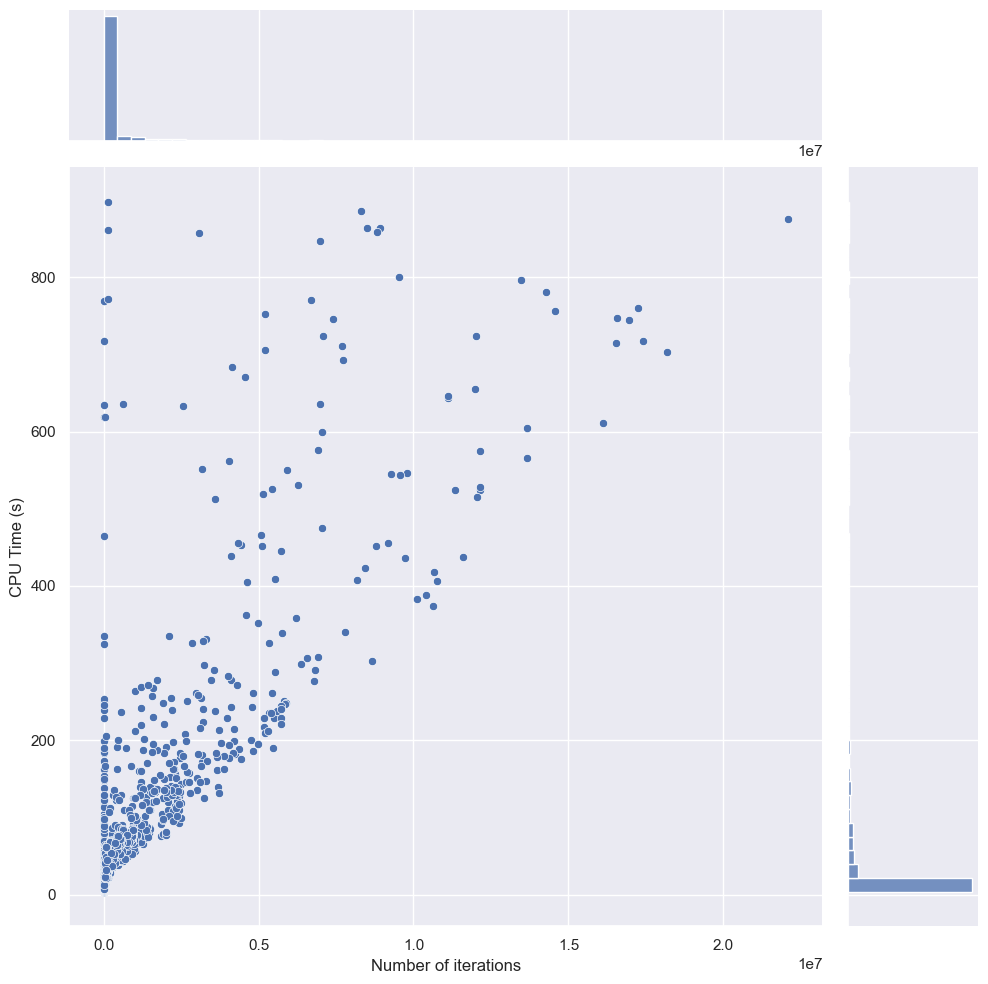

In [12]:
sns.jointplot(data=data_1, x="Number of iterations", y="CPU Time (s)", height=10, marginal_kws={"bins":50,});